In [1]:
import pandas as pd     
import numpy as np 
import glob as glob
import matplotlib.pyplot as plt

Base=[]
csv_files = glob.glob('Data/*.csv')

for filename in csv_files:
    if filename == "Data\\EAM_2020.csv":
        print("ok")
        data = pd.read_csv(filename,sep=",")   
    else:
        data = pd.read_csv(filename,sep=";")
      
    Base.append(data)

c:\Users\User\Documents\TrabajoGrado\env\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (299) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\User\Documents\TrabajoGrado\env\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (182,183,184,185,186,187,188,189,190,191,302) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\User\Documents\TrabajoGrado\env\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,2

ok


In [2]:
EAM08,EAM09,EAM10,EAM11,EAM12,EAM13,EAM14,EAM15,EAM16,EAM17,EAM18,EAM19,EAM20 = Base
#Assign each dataframe a variable of the "Base"
Data_Merge = [EAM08,EAM09,EAM10,EAM11,EAM12,EAM13,EAM14,EAM15,EAM16,EAM17,EAM18,EAM19,EAM20]
#Create a list of the dataframe
EAM08_G,EAM09_G,EAM10_G,EAM11_G,EAM12_G,EAM13_G,EAM14_G, \
            EAM15_G,EAM16_G,EAM17_G,EAM18_G,EAM19_G,EAM20_G=\
                0,0,0,0,0,0,0,0,0,0,0,0,0
Data_Gruop = [EAM08_G,EAM09_G,EAM10_G,EAM11_G,EAM12_G,EAM13_G,EAM14_G, \
            EAM15_G,EAM16_G,EAM17_G,EAM18_G,EAM19_G,EAM20_G]

In [3]:
#PARA CAMBIAR UN LABEL EN UNA UBICACIÓN ESPECIFICA NO ESTANDARIZADO
def change_name(Data_Merge, Number, change):
    for df in Data_Merge:
        if len(df.columns) > Number: #Verificar si el dataframe tiene al menos 4 columnas
            df.columns.values[Number] = change #Me cambia el name de el label 
    return Data_Merge

In [4]:
#Para estandairzar los labels
def change_label(Data_Merge):
    for df in Data_Merge:
        columnas = df.columns.tolist() #Crea una lista de columnas
        nuevas_columnas = [columna.upper() for columna in columnas] # coloca en mayusculas cada columna de lista
        df.columns = nuevas_columnas #Asigna el nuevo nombre
    return Data_Merge

In [5]:
#Función para saber si una columna esta presente en un dataframe
def Exis(Data_Merge, item):
    for i, df in enumerate(Data_Merge):
        if item not in df.columns:
            columna_ausente = True
            print(f"El item no está presente en el DataFrame {i}.")
        else:
            columna_ausente = False
            print(f"El item  está presente en el DataFrame {i}.")
    return columna_ausente

In [6]:
#Función para saber si existen datos faltantes en la columna
def exis_colum(Data_Merge,colum):
    missing_col=0
    for i in Data_Merge:
        missing_col += i[colum].isnull().sum()
    return missing_col

In [7]:
#Función para ordenar, por una columna 
def Sort(Column,Data_Merge):
    for i, d in enumerate(Data_Merge):
        sorted_df = d.sort_values(by=Column)
        Data_Merge[i] = sorted_df 
    return Data_Merge

In [8]:
def calculate_avg_or_sum(Column, SUMATION, UBACATION, Data_Gruop, Data_Merge, operation):
    for i, df in enumerate(Data_Gruop):
        for index in df.index:
            if index in Data_Merge[i][Column].unique():
                if operation == 'mean':
                    total = Data_Merge[i][Data_Merge[i][Column] == index][SUMATION].mean()
                elif operation == 'sum':
                    total = Data_Merge[i][Data_Merge[i][Column] == index][SUMATION].sum()
                df.loc[index, UBACATION] = total
    return Data_Gruop

In [9]:
def sum_of_rows(row,Colum1,Colum2):
    return row[Colum1] + row[Colum2]

In [28]:
def IHH(Column, Divisor, Numerator, Ubac, Data_Gruop, Data_Merge):
  for i, df in enumerate(Data_Gruop):
    for index in df.index:
      if index in Data_Merge[i][Column].unique():               
        Numerator = Data_Merge[i].set_index(Column)[Divisor]
        Denominator = df["SUM-WORKERS"]
        Total = (Numerator / Denominator) * 100
        Data_Merge[i].loc[Data_Merge[i][Column], Ubac] = Total
  return Data_Merge

In [11]:
Data_Merge = change_name(Data_Merge,3,"CIIU")

In [12]:
Data_Merge = change_label(Data_Merge)

In [13]:
exis_colum(Data_Merge,"CIIU")
exis_colum(Data_Merge,"C4R4C9T")
exis_colum(Data_Merge,"C4R4C10T")

0

In [14]:
Data_Merge=Sort("CIIU",Data_Merge)

In [15]:
#Para crear un data frame agrupado de una base de datos
for i in range (len(Data_Merge)):
    index=Data_Merge[i]["CIIU"].drop_duplicates().sort_values()
    Data_Gruop[i]= pd.DataFrame(index=index,columns=["SUM-WORKERS_M","SUM-WORKERS_F","SUM-WORKERS","SUM-WAGE","IHH"])


In [16]:
Data_Gruop=calculate_avg_or_sum("CIIU","C4R4C9T","SUM-WORKERS_F",Data_Gruop,Data_Merge,"sum")
Data_Gruop=calculate_avg_or_sum("CIIU","C4R4C10T","SUM-WORKERS_M",Data_Gruop,Data_Merge,"sum")
Data_Gruop=calculate_avg_or_sum("CIIU","C3R2C3","SUM-WAGE",Data_Gruop,Data_Merge,"mean")

In [17]:
for df  in Data_Gruop:
    df["SUM-WORKERS"] = df.apply(lambda row: sum_of_rows(row,"SUM-WORKERS_M","SUM-WORKERS_F"), axis=1)

In [18]:
for df  in Data_Merge:
    df["WORKERS"] = df.apply(lambda row: sum_of_rows(row,"C4R4C10T","C4R4C9T"), axis=1)
    df["IHH_ONE"] = None

In [29]:
Data_Merge=IHH("CIIU","WORKERS","SUM-WORKERS","IHH_ONE",Data_Gruop,Data_Merge)

In [31]:
Data_Gruop=calculate_avg_or_sum("CIIU","IHH_ONE","IHH",Data_Gruop,Data_Merge,"sum")

In [41]:
for i, df in enumerate(Data_Gruop):
    df["IHH_cuadrado"] = df["IHH"] ** 2

    conditions = [
        df["IHH_cuadrado"] < 1500,
        (1500 <= df["IHH_cuadrado"]) & (df["IHH_cuadrado"] < 2500),
        df["IHH_cuadrado"] >= 2500
    ]
    values = [1, 2, 3]

    df["IHH_resultado"] = np.select(conditions, values, default=np.nan)


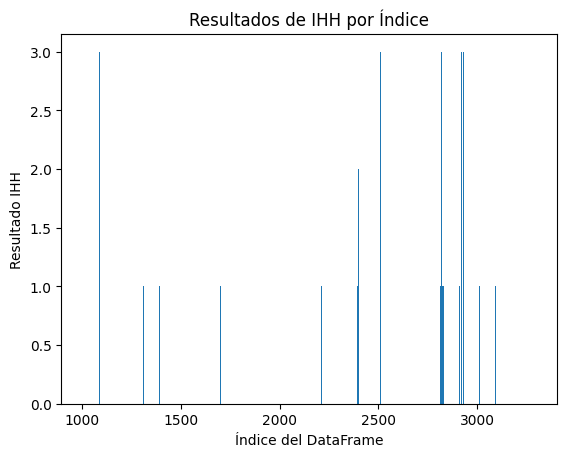

In [43]:
import matplotlib.pyplot as plt

# Supongamos que Data_Gruop es la lista de dataframes que ya tienes

# Obtener el primer dataframe de la lista
df = Data_Gruop[12]

# Crear una figura para el gráfico
plt.figure()

# Graficar los resultados de IHH_resultado con un gráfico de barras
plt.bar(df.index, df["IHH_resultado"])

# Etiquetas y título del gráfico
plt.xlabel("Índice del DataFrame")
plt.ylabel("Resultado IHH")
plt.title("Resultados de IHH por Índice")

# Mostrar el gráfico
plt.show()
